In [ ]:
import pandas as pd
import numpy as np

# Ensure random seed for reproducibility
np.random.seed(42)

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:")
print(null_values)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,1
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,1
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,1
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,1


In [119]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

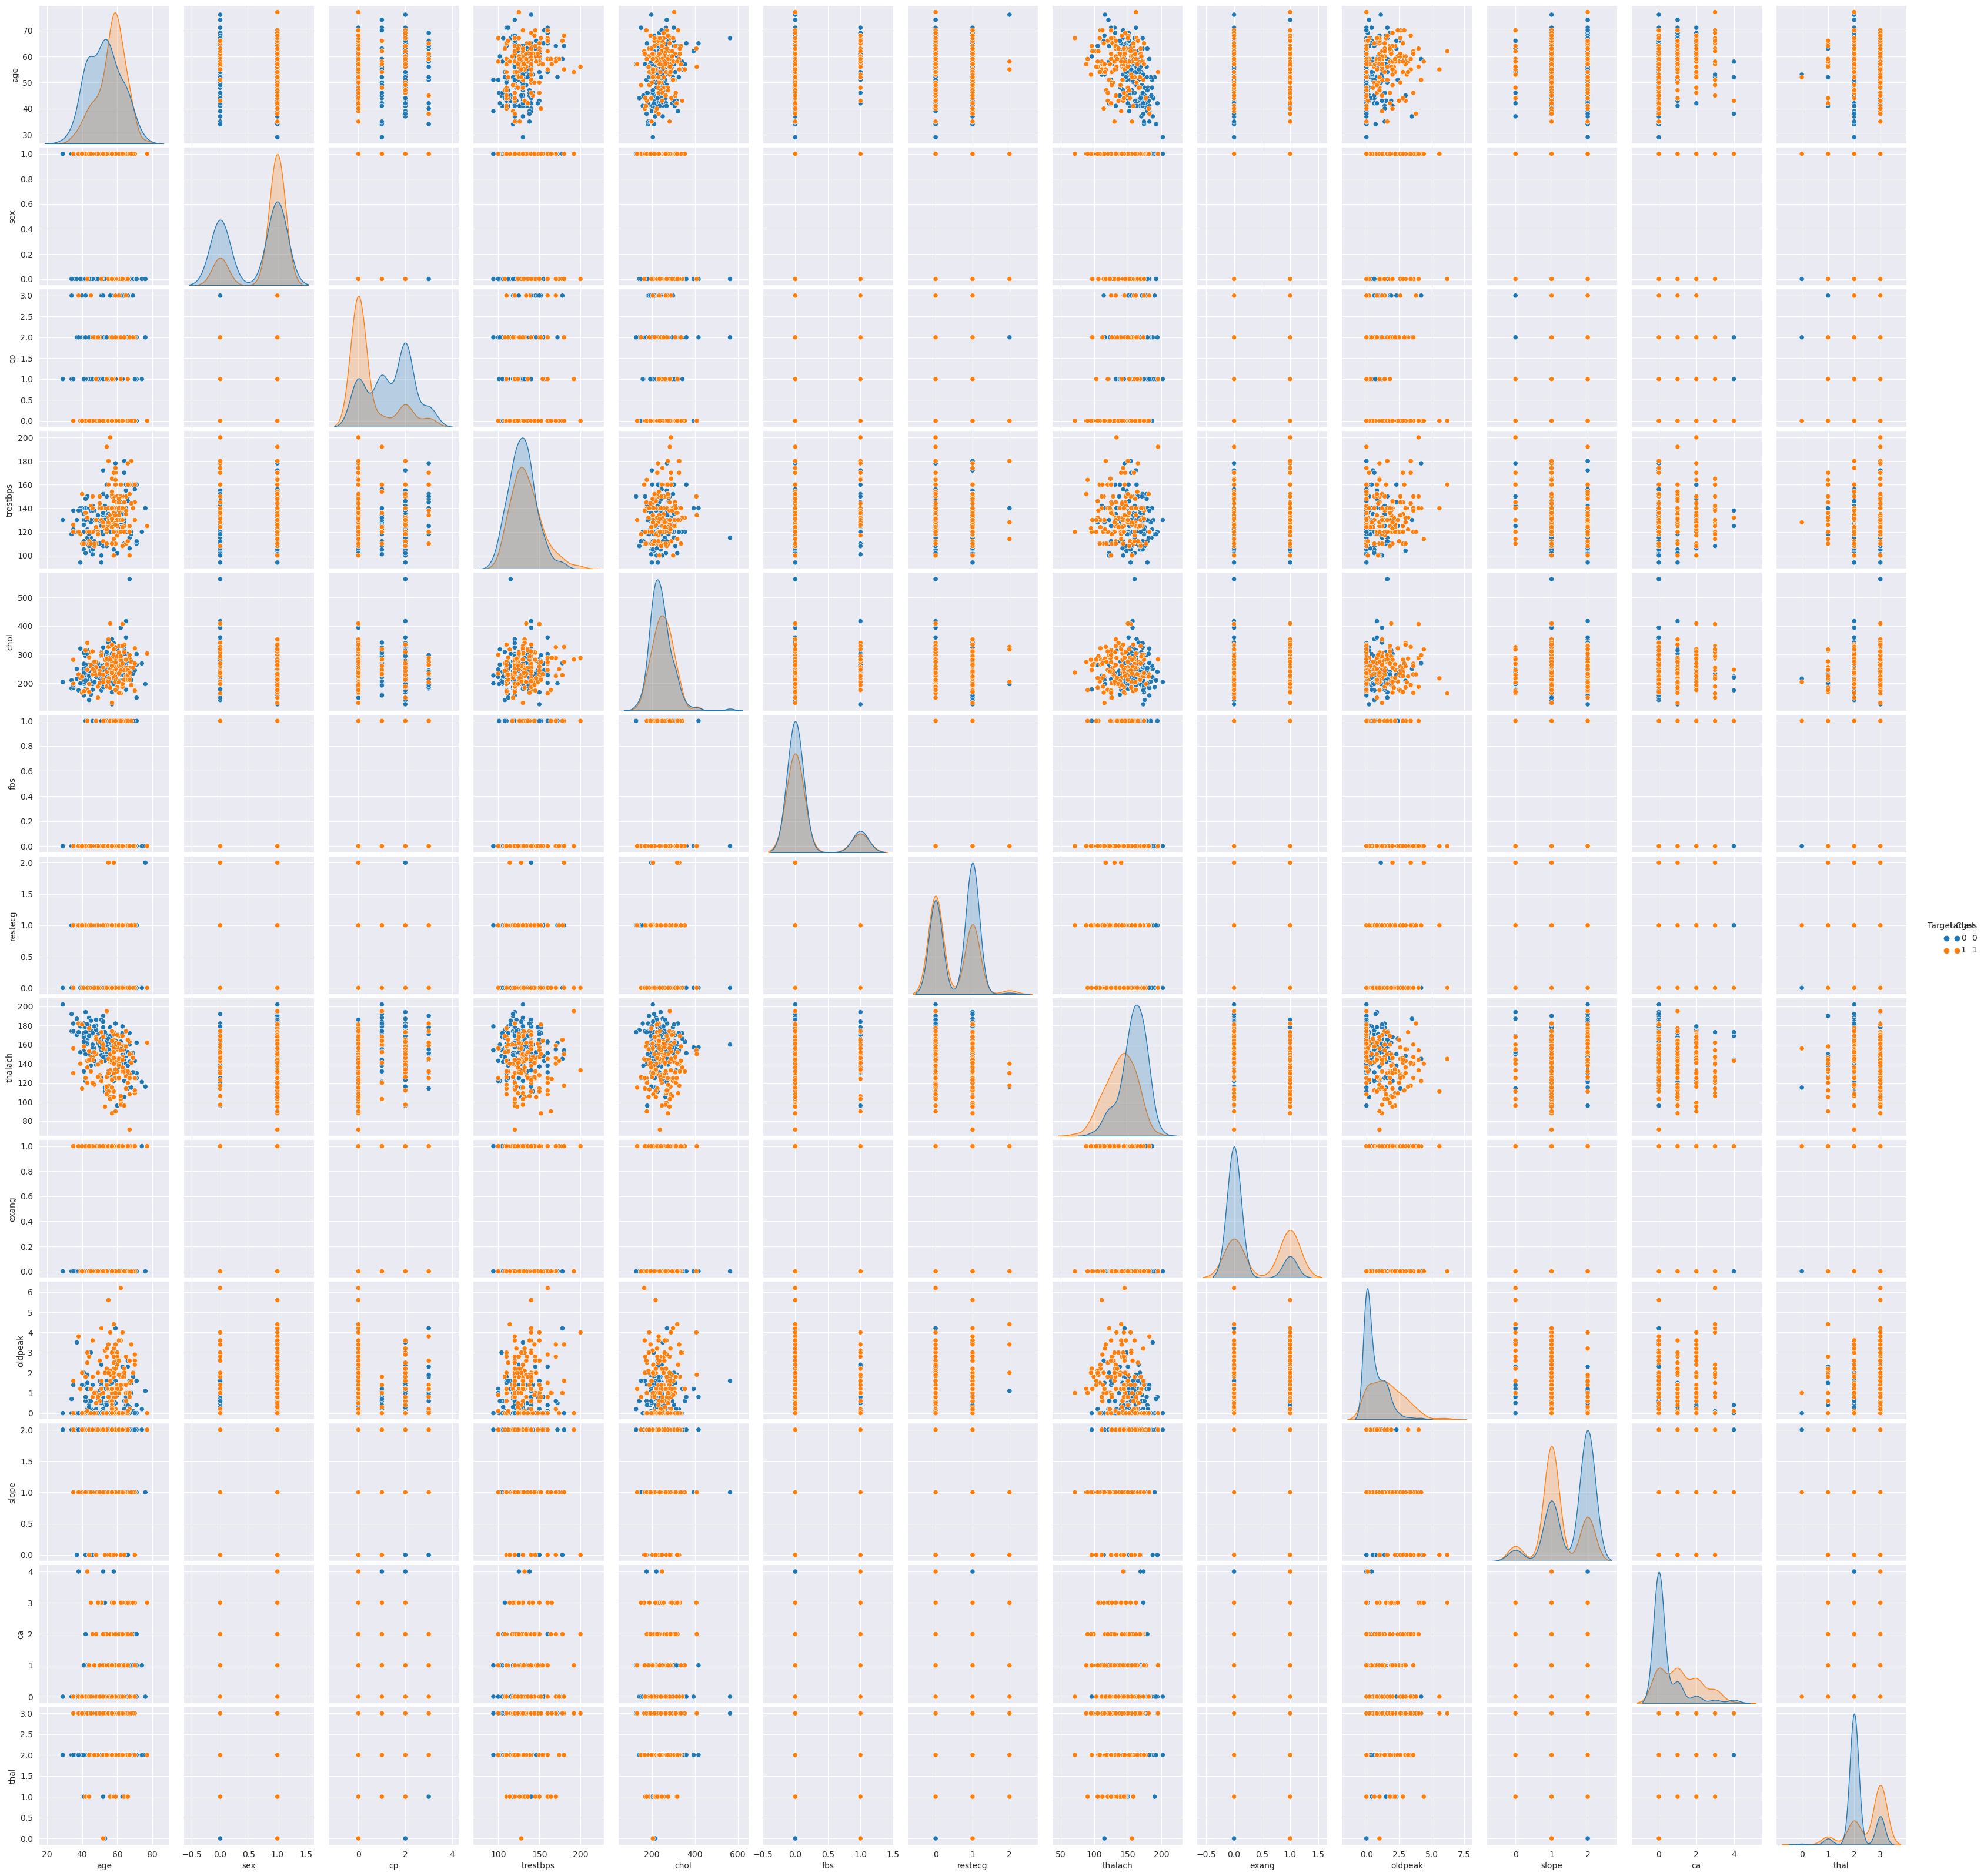

In [120]:
#Statistical study
import seaborn as sns
import matplotlib.pyplot as plt
pair_plot = sns.pairplot(df, hue='target')
pair_plot.add_legend(title='Target Class')
plt.show()

<Axes: xlabel='sex', ylabel='target'>

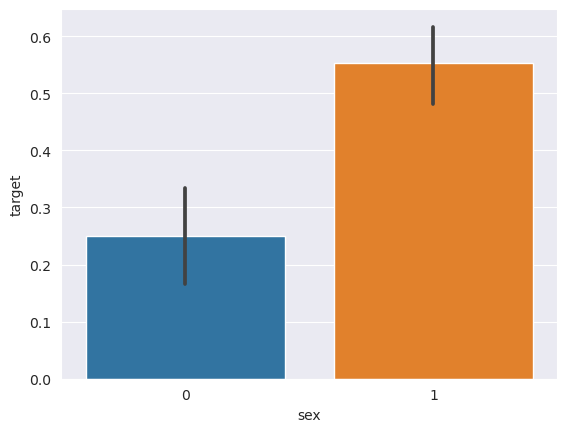

In [121]:
#Statsictical Study, studying correlation between sex and heart disease
sns.barplot(y='target', x='sex', data=df)

In [122]:
#Statistical study
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['target'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant association between sex and heart disease.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant association between sex and heart disease.")


Contingency Table:
target   0    1
sex            
0       72   24
1       92  114

Chi-Square Statistic: 23.083879459669042
p-value: 1.5508552054949547e-06
Degrees of Freedom: 1
Expected Frequencies:
[[ 52.13245033  43.86754967]
 [111.86754967  94.13245033]]

Conclusion: Reject the null hypothesis. There is a significant association between sex and heart disease.


In [123]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the data into two groups based on the target
group1 = df[df['target'] == 0]['age']  # Patients without heart disease
group2 = df[df['target'] == 1]['age']  # Patients with heart disease

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis. There is a significant difference in age between patients with and without heart disease.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no significant difference in age between patients with and without heart disease.")


t-statistic: -3.9337655411101426
p-value: 0.00010394837285416688

Conclusion: Reject the null hypothesis. There is a significant difference in age between patients with and without heart disease.


In [124]:
#Find numerical columns
numerical_cols = []
for column in df.columns:
    if len(df[column].unique()) > 10 and column != 'target':
        numerical_cols.append(column)

In [125]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
df

In [127]:
#function to train models with and without PCA
def train_model_with_and_without_pca(dic, model, model_2, desc):
    X_train, X_test, y_train, y_test, X_train_pca, X_test_pca = dic['X_train'], dic['X_test'], dic['y_train'], dic['y_test'], dic['X_train_pca'], dic['X_test_pca']
    model.fit(X_train, y_train)
    print(f"{desc} without PCA: {round(model.score(X_test, y_test),3)}")
    model_2.fit(X_train_pca, y_train)
    print(f"{desc} with PCA: {round(model_2.score(X_test_pca, y_test),3)}")

In [128]:
#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_numerical = X[numerical_cols]
X_scaled = scaler.fit_transform(X_numerical)
X_full = pd.concat([X.drop(numerical_cols, axis=1), pd.DataFrame(X_scaled, columns=numerical_cols)], axis=1)
X_full

In [129]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.1, random_state=42)

In [130]:
#Bring Models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose =-1),
    "XGBoost": XGBClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

for desc, model in models.items():
    model.fit(X_train, y_train)
    print(f"{desc} Accuracy: {round(model.score(X_test, y_test),3)}")
    

Random Forest Accuracy: 0.839
LightGBM Accuracy: 0.774
SVC Accuracy: 0.903
Logistic Regression Accuracy: 0.871


In [131]:
#PCA, kept 95% of the variance
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [132]:
training_dic = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'X_train_pca': X_train_pca, 'X_test_pca': X_test_pca}

In [133]:
#Testing Random Forest
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model_2 = RandomForestClassifier(random_state=42)

train_model_with_and_without_pca(training_dic, model, model_2, "Random Forest Accuracy")


Random Forest Accuracy without PCA: 0.839
Random Forest Accuracy with PCA: 0.871


In [134]:
#Testing XGB
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 42)
model_2 = XGBClassifier(random_state = 42)

train_model_with_and_without_pca(training_dic, model, model_2, "XGBoost Accuracy")

XGBoost Accuracy without PCA: 0.742
XGBoost Accuracy with PCA: 0.871


In [135]:
#Testing
from lightgbm import LGBMClassifier

model = LGBMClassifier(verbosity=-1, random_state=42)
model_2 = LGBMClassifier(verbosity=-1, random_state=42)

train_model_with_and_without_pca(training_dic, model, model_2, "LightGBM Accuracy")

LightGBM Accuracy without PCA: 0.774
LightGBM Accuracy with PCA: 0.839


In [136]:
#Testing SVC
from sklearn.svm import SVC

model = SVC(random_state=42)
model_2 = SVC(random_state=42)

train_model_with_and_without_pca(training_dic, model, model_2, "SVC Accuracy")

SVC Accuracy without PCA: 0.903
SVC Accuracy with PCA: 0.839


In [137]:
#Tetsing Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model_2 = LogisticRegression(random_state=42)

train_model_with_and_without_pca(training_dic, model, model_2, "Logistic Regression Accuracy")

Logistic Regression Accuracy without PCA: 0.871
Logistic Regression Accuracy with PCA: 0.903


In [138]:
#Ensemble
from sklearn.ensemble import VotingClassifier

model1 = RandomForestClassifier(random_state=42)
model2 = XGBClassifier(random_state=42)
model3 = LGBMClassifier(verbose=-1, random_state=42)
model4 = SVC(probability=True, random_state=42)
model5 = LogisticRegression(random_state=42)

model = VotingClassifier(estimators=[('rf', model1), ('xgb', model2), ('lgbm', model3), ('svc', model4), ('lr', model5)], voting='soft')
model_2 = VotingClassifier(estimators=[('rf', model1), ('xgb', model2), ('lgbm', model3), ('svc', model4), ('lr', model5)], voting='soft')

train_model_with_and_without_pca(training_dic, model, model_2, "Ensemble Accuracy")

Ensemble Accuracy without PCA: 0.806
Ensemble Accuracy with PCA: 0.871


In [139]:
#Function for Optimization
def optimize_model_with_and_without_pca(dic, model, model_2, param_dist, desc):
    X_train, X_test, y_train, y_test, X_train_pca, X_test_pca = dic['X_train'], dic['X_test'], dic['y_train'], dic['y_test'], dic['X_train_pca'], dic['X_test_pca']
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=200, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    test_accuracy = best_model.score(X_test, y_test)
    print(f"{desc} without PCA: {round(test_accuracy,3)}")

    random_search = RandomizedSearchCV(estimator=model_2, param_distributions=param_dist, n_iter=200, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train_pca, y_train)
    best_model = random_search.best_estimator_
    test_accuracy = best_model.score(X_test_pca, y_test)
    print(f"{desc} with PCA: {round(test_accuracy,3)}")

In [140]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform

# Define the models
model1 = RandomForestClassifier(random_state=42)
model2 = XGBClassifier(random_state=42)
model3 = LGBMClassifier(verbose=-1, random_state=42)
model4 = SVC(probability=True, random_state=42)
model5 = LogisticRegression(random_state=42)

# Define the ensemble model
voting_model = VotingClassifier(estimators=[
    ('rf', model1),
    ('xgb', model2),
    ('lgbm', model3),
    ('svc', model4),
    ('lr', model5)
], voting='soft')

voting_model_2 = VotingClassifier(estimators=[
    ('rf', model1),
    ('xgb', model2),
    ('lgbm', model3),
    ('svc', model4),
    ('lr', model5)
], voting='soft')

# Define the parameter distributions for Random Search
param_dist = {
    'rf__n_estimators': randint(50, 200),
    'rf__max_depth': [None, 10, 20, 30, 40, 50],
    'xgb__n_estimators': randint(50, 200),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'xgb__max_depth': randint(3, 10),
    'lgbm__n_estimators': randint(50, 200),
    'lgbm__learning_rate': uniform(0.01, 0.2),
    'lgbm__max_depth': randint(3, 10),
    'svc__C': uniform(0.1, 10),
    'svc__kernel': ['linear', 'rbf'],
    'lr__C': uniform(0.1, 10),
    'lr__solver': ['liblinear', 'lbfgs']
}

optimize_model_with_and_without_pca(training_dic, voting_model, voting_model_2, param_dist, "Optimized Ensemble Accuracy")


Optimized Ensemble Accuracy without PCA: 0.806
Optimized Ensemble Accuracy with PCA: 0.871


In [155]:
import xgboost as xgb
from scipy.stats import uniform, randint, loguniform

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model_2 = xgb.XGBClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(30, 150),
    'max_depth': randint(3, 50),
    'learning_rate': loguniform(0.01, 1),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_alpha': loguniform(0.01, 1),
    'reg_lambda': loguniform(0.01, 1),
    'min_child_weight': randint(1, 10),
    'eval_metric':['rmse','mae','logloss']
}

optimize_model_with_and_without_pca(training_dic, xgb_model, xgb_model_2, param_dist, "Optimized XGBoost Accuracy")

Optimized XGBoost Accuracy without PCA: 0.839
Optimized XGBoost Accuracy with PCA: 0.871


In [142]:
import lightgbm as lgb
from scipy.stats import uniform, randint

lgb_model = lgb.LGBMClassifier(verbose = -1, random_state=42)
lgb_model_2 = lgb.LGBMClassifier(verbose = -1, random_state=42)
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),  # Range: [0.6, 1.0]
    'colsample_bytree': uniform(0.6, 0.4),  # Range: [0.6, 1.0]
    'num_leaves': randint(20, 100),
    'min_child_samples': randint(5, 100),
    'reg_alpha': uniform(0.01, 1),
    'reg_lambda': uniform(0.01, 1)
}

optimize_model_with_and_without_pca(training_dic, lgb_model, lgb_model_2, param_dist, "Optimized LightGBM Accuracy")

Optimized LightGBM Accuracy without PCA: 0.806
Optimized LightGBM Accuracy with PCA: 0.839


In [143]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

logreg_model = LogisticRegression(solver='liblinear', random_state=42)
logreg_model_2 = LogisticRegression(solver='liblinear', random_state=42)
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.01, 100),
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced']
}

optimize_model_with_and_without_pca(training_dic, logreg_model, logreg_model_2, param_dist, "Optimized Logistic Regression Accuracy")

Optimized Logistic Regression Accuracy without PCA: 0.871
Optimized Logistic Regression Accuracy with PCA: 0.903


In [144]:
from sklearn.svm import SVC
from scipy.stats import uniform

svc_model = SVC(random_state=42)
svc_model_2 = SVC(random_state=42)
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.0001, 1),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': randint(2, 5),
    'coef0': uniform(0, 1),
    'class_weight': [None, 'balanced']
}

optimize_model_with_and_without_pca(training_dic, svc_model, svc_model_2, param_dist, "Optimized SVC Accuracy")

Optimized SVC Accuracy without PCA: 0.903
Optimized SVC Accuracy with PCA: 0.935


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

rf_model = RandomForestClassifier(random_state=42)
rf_model_2 = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None]
}

optimize_model_with_and_without_pca(training_dic, rf_model, rf_model_2, param_dist, "Optimized Random Forest Accuracy")

Optimized Random Forest Accuracy without PCA: 0.839
Optimized Random Forest Accuracy with PCA: 0.871
